In [ ]:
from transformers import pipeline

In [2]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


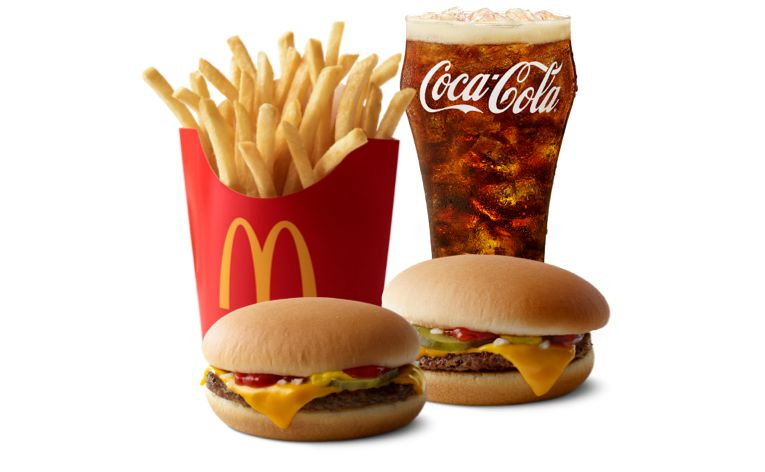

In [3]:
from PIL import Image
import requests

image_url = "https://s7d1.scene7.com/is/image/mcdonalds/DC_202201_8950_EVM_M_2Cheeseburger_Coke_Glass_832x472:1-3-product-tile-desktop?wid=765&hei=472&dpr=off"
image = Image.open(requests.get(image_url, stream=True).raw)

image

In [11]:
labels = ["french fries", "burger", "drink"]
predictions = detector(image, candidate_labels = labels)

In [12]:
predictions

[{'score': 0.3459661602973938,
  'label': 'burger',
  'box': {'xmin': 385, 'ymin': 257, 'xmax': 612, 'ymax': 407}},
 {'score': 0.31484973430633545,
  'label': 'burger',
  'box': {'xmin': 203, 'ymin': 290, 'xmax': 430, 'ymax': 442}},
 {'score': 0.25835713744163513,
  'label': 'drink',
  'box': {'xmin': 403, 'ymin': 13, 'xmax': 576, 'ymax': 262}},
 {'score': 0.1873398870229721,
  'label': 'french fries',
  'box': {'xmin': 138, 'ymin': 24, 'xmax': 411, 'ymax': 199}},
 {'score': 0.10416828840970993,
  'label': 'drink',
  'box': {'xmin': 180, 'ymin': 120, 'xmax': 397, 'ymax': 342}}]

In [13]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

for pred in predictions:
    box = pred['box']
    label = pred['label']
    score = pred['score']
    draw.rectangle((box['xmin'], box['ymin'], box['xmax'],box['ymax']))
    draw.text((box['xmin'], box['ymin']), f'{label}: {round(score, 2)}', fill='black')

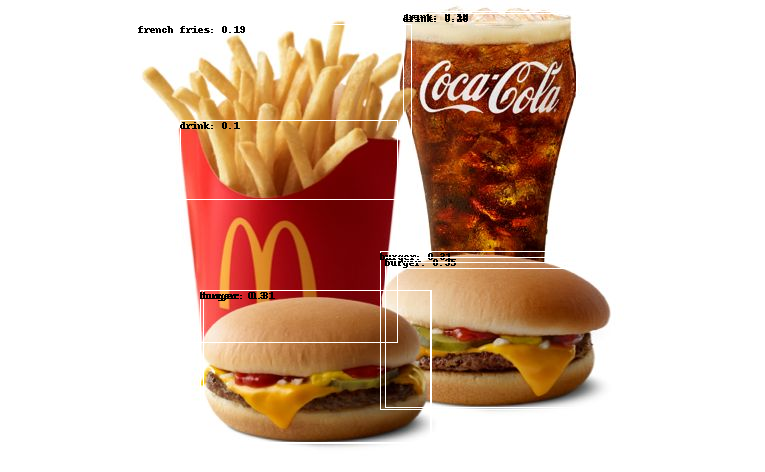

In [14]:
image